# Airline on time data
## by [Gustavo Bertoli](https://github.com/gubertoli/data_analyst_nanodegree)

## Preliminary Wrangling

> This dataset comprises a collection from 1987 to 2008 of scheduled flights performance (on-time, delays, cancellations) from many airports in the USA.

> The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed  **(in this work only the data from 2006 to 2008 is analyzed due to computer resources constraint)**. 

> Some open questions based on this dataset:
> - When is the best time of day/day of week/time of year to fly to minimise delays?
> - Do older planes suffer more delays?
> - How does the number of people flying between different locations change over time?
> - How well does weather predict plane delays?
> - Can you detect cascading failures as delays in one airport create delays in others? Are there critical links in the system?
> - Are there certain destination or arrival cities that are home to more delays or cancellations?
> - What are the preferred times for flights to occur? Are there any changes over multiple years?

> References: 
> 1. https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7
> 2. http://stat-computing.org/dataexpo/2009/
> 3. [Dataset Features Description](https://www.transtats.bts.gov/Fields.asp?Table_ID=236)

# Data Exploration Index
- [Structure of the dataset](#structure)
- [Features of interest](#features)
- [Univariate Analysis](#univariate)
- [Bivariate Analysis](#bivariate)
- [Multivariate Analysis](#multivariate)

---

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# increase the number of columns to be displayed
pd.set_option('display.max_columns', 50)

In [3]:
import glob

all_files = glob.glob("./data/*.bz2")

li = []

for filename in all_files:
    frame = pd.read_csv(filename, index_col=None, header=0, compression='bz2', encoding='latin_1')
    li.append(frame)

df = pd.concat(li, axis=0, ignore_index=True)
del frame
del li
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27.0,19.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27.0,12.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


<a id="structure"></a>
### Structure of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16984354 entries, 0 to 16984353
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 3.7+ GB


In [5]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.698435e+07,1.698435e+07,1.698435e+07,1.698435e+07,1.663723e+07,1.698435e+07,1.659821e+07,1.698435e+07,1.698435e+07,1.659821e+07,1.698295e+07,1.659821e+07,1.659821e+07,1.663723e+07,1.698435e+07,1.691426e+07,1.691991e+07,1.698435e+07,1.698435e+07,1.517972e+07,1.517972e+07,1.517972e+07,1.517972e+07,1.517972e+07
mean,2.006720e+03,5.970939e+00,1.571915e+01,3.937186e+00,1.339827e+03,1.331206e+03,1.484658e+03,1.495739e+03,2.191166e+03,1.265325e+02,1.275218e+02,1.031516e+02,9.566669e+00,1.085349e+01,7.241441e+02,6.868338e+00,1.611894e+01,2.043787e-02,2.297350e-03,4.102358e+00,8.110254e-01,4.167233e+00,2.933598e-02,5.435765e+00
std,6.948869e-01,3.496356e+00,8.779192e+00,1.990502e+00,4.785037e+02,4.639545e+02,5.046566e+02,4.807802e+02,1.976456e+03,7.111536e+01,7.022136e+01,7.174682e+01,3.823369e+01,3.511446e+01,5.667792e+02,2.059017e+01,1.149534e+01,1.414926e-01,4.787559e-02,2.113781e+01,9.679868e+00,1.688402e+01,1.209718e+00,2.179563e+01
min,2.006000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,-1.240000e+03,-1.425000e+03,-5.920000e+02,-1.200000e+03,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.006000e+03,3.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.300000e+02,1.109000e+03,1.115000e+03,5.890000e+02,7.500000e+01,7.700000e+01,5.500000e+01,-9.000000e+00,-4.000000e+00,3.180000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.007000e+03,6.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,1.324000e+03,1.515000e+03,1.520000e+03,1.507000e+03,1.080000e+02,1.100000e+02,8.500000e+01,-1.000000e+00,0.000000e+00,5.740000e+02,5.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.007000e+03,9.000000e+00,2.300000e+01,6.000000e+00,1.732000e+03,1.720000e+03,1.911000e+03,1.907000e+03,3.521000e+03,1.570000e+02,1.570000e+02,1.320000e+02,1.400000e+01,1.000000e+01,9.520000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.008000e+03,1.200000e+01,3.100000e+01,7.000000e+00,2.930000e+03,2.359000e+03,2.955000e+03,2.400000e+03,9.741000e+03,1.879000e+03,1.435000e+03,1.958000e+03,2.598000e+03,2.601000e+03,4.962000e+03,1.501000e+03,6.020000e+02,1.000000e+00,1.000000e+00,2.580000e+03,1.429000e+03,1.392000e+03,3.920000e+02,1.366000e+03


<a id="features"></a>
### Main feature(s) of interest in the dataset

> The main features of interest are those related with undesired behaviour of flights (Cancelled, Diverted, Delay) 

> - ArrDelay and DepDelay _(in minutes)_
> - `Cancelled`, `Diverted` _(1 = Yes)_
> - (Carrier, Weather, NAS*, Security, LateAircraft)`Delay` _(in minutes)_
>
> _*NAS = National Air System_

### Features in the dataset that could help support the investigation into feature(s) of interest

> The detais about each event, such as Scheduled times (Prefix CRS) and the real values of this events (without CRS prefix):

> - `DepTime` and `CRSDepTime`
> - `ArrTime` and `CRSArrTime`
> - `ActualElapsedTime` and `CRSElapsedTime`
> - The day of week and season of the year can support the understanding of these events (`Month`, `DayOfWeek`)
> - The specific airports and airlines can also present inneficient behaviors (retrieve from `UniqueCarrier`, `Origin`, `Dest`)
> - Flights distances (`Distance`) are correlated with greater delays ?

---
<a id="univariate"></a>
## Univariate Exploration

> In this section, investigate distributions of individual variables

### Quantity of flights according to `Day of Week` and `Month`

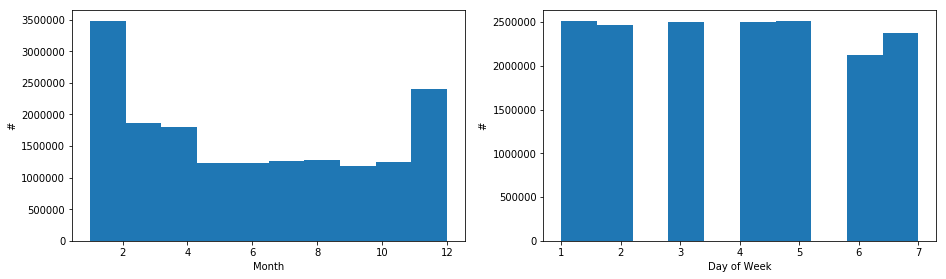

In [6]:
plt.Figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.ylabel('#')
plt.xlabel('Month')
plt.hist(df['Month']);

plt.subplot(1,2,2)
plt.ylabel('#')
plt.xlabel('Day of Week')
plt.hist(df['DayOfWeek'])
plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35);

> Most of the flights are made between december and january, the day of week seems to be equally distributed. It is important to verify if the quantity of unscheduled events are related with those months with more flights (dec-jan)

### Distribution of Flights Cancellation by Reason

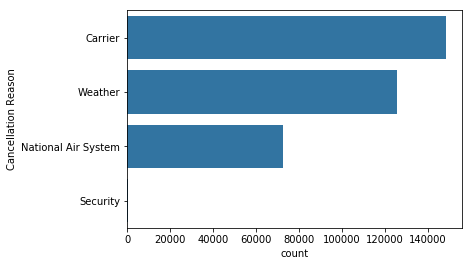

In [7]:
cancellation_codes = {"A" : "Carrier", "B" : "Weather", "C" : "National Air System", "D" : "Security"}
df["CancellationCode"].replace(cancellation_codes, inplace=True)
sb.countplot(data=df, y='CancellationCode', color=sb.color_palette()[0],
            order = df['CancellationCode'].value_counts().index)
plt.ylabel('Cancellation Reason');

In [8]:
df['CancellationCode'].value_counts()

Carrier                148509
Weather                125593
National Air System     72821
Security                  202
Name: CancellationCode, dtype: int64

> The majority of **Cancellation** are related with Carrier, Weather, and National Air System. Just a few relates to Security

### Distribution of Departure and Arrival Delays

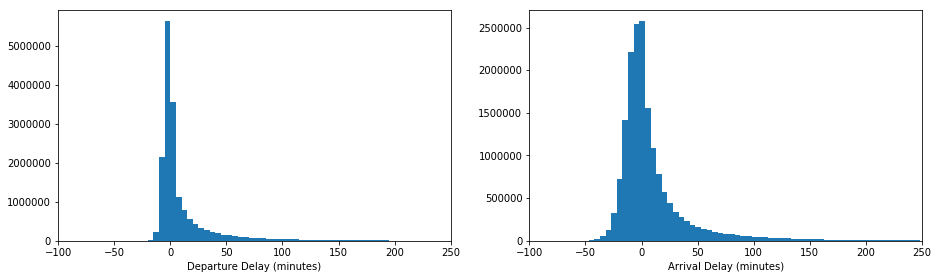

In [9]:
plt.Figure(figsize=(10,10))

plt.subplot(1,2,1)
bins = np.arange(df['DepDelay'].min(), df['DepDelay'].max()+5, 5)
plt.hist(df['DepDelay'].fillna(0), bins=bins)
plt.xlabel('Departure Delay (minutes)');
plt.xlim([-100, 250])

plt.subplot(1,2,2)
bins = np.arange(df['ArrDelay'].min(), df['ArrDelay'].max()+5, 5)
plt.hist(df['ArrDelay'].fillna(0), bins=bins)
plt.xlabel('Arrival Delay (minutes)')
plt.xlim([-100, 250])

plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35);

### Distribution of `Arrival` and `Departure` delays

> Both **Arrival** and **Departure** delays have a great range of values (including outliers) from the maximum negative of -1000 (_negative means prior to scheduled time_) until max positive value of 2500 minutes - long tail distribution.
>
> Considering just the most frequent occurences the majority of delays are between *-50 to 200* minutes for `Departure` and *-50 to 250* minutes for `Arrival`


---
<a id="bivariate"></a>
## Bivariate Exploration

> In this section, it is presented the relationships between pairs of variables in data.

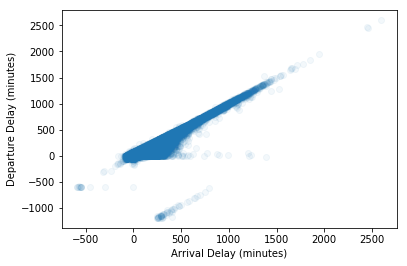

In [11]:
plt.scatter(x=df['ArrDelay'], y=df['DepDelay'], alpha=0.05)
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Departure Delay (minutes)');

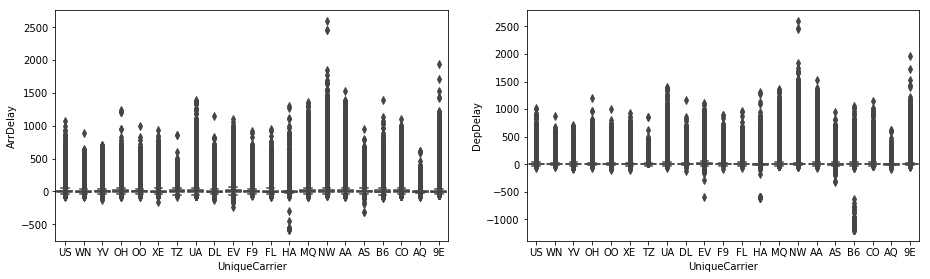

In [16]:
plt.Figure(figsize=(10,10))

plt.subplot(1,2,1)
sb.boxplot(data=df, x='UniqueCarrier', y='ArrDelay', )

plt.subplot(1,2,2)
sb.boxplot(data=df, x='UniqueCarrier', y='DepDelay', );

plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35);

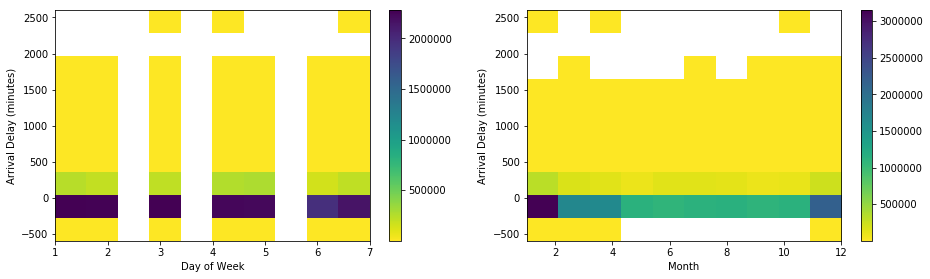

In [17]:
df.fillna(0, inplace=True)
plt.subplot(1,2,1)
plt.hist2d(data = df, x = 'DayOfWeek', y = 'ArrDelay', cmap = 'viridis_r', cmin = 0.5)
plt.xlabel('Day of Week')
plt.ylabel('Arrival Delay (minutes)')
plt.colorbar()

plt.subplot(1,2,2)
plt.hist2d(data = df, x = 'Month', y = 'ArrDelay', cmap = 'viridis_r', cmin = 0.5)
plt.xlabel('Month')
plt.ylabel('Arrival Delay (minutes)')
plt.colorbar()

plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35);

### Relationships observed

> It is clear from the bivariate analysis the positive and linear relationship between `Departure Delay` and `Arrival Delay`, once a delay during departure is reflected in the arrival.

> From all the available carriers the *Northwest Airlines (NW)* presented higher of outliers for Departure and consequently Arrival delay

### Interesting relationships between the other features

> It is expected the impact of day of week (traffic in especific days) or during the year (due to weather changes) to cause some kind of delay increase, however, there are no direct relations from `Day of Week` and `Month` with the occurrence of delays

---
<a id="multivariate"></a>
## Multivariate Exploration

> Here three or more variables are investigated even further. 

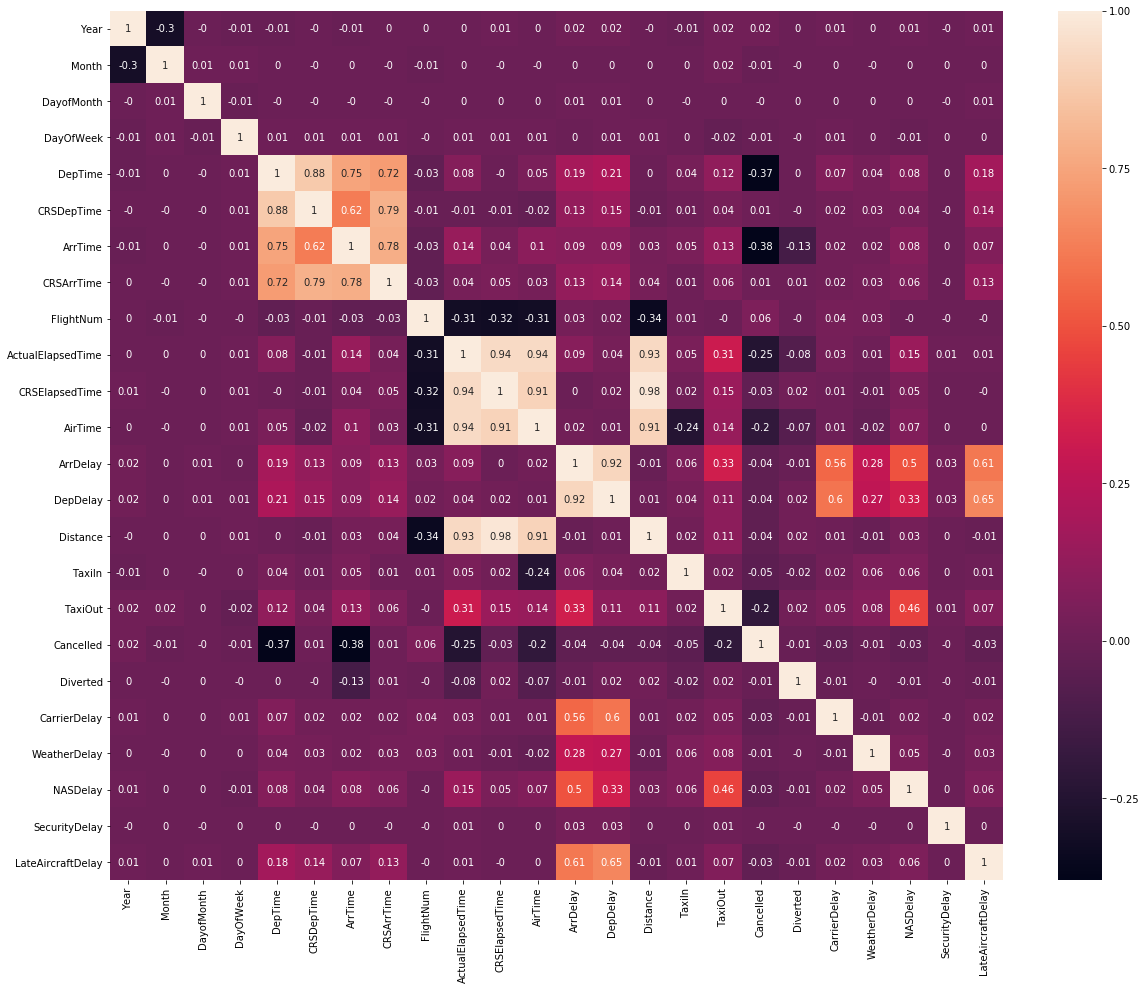

In [15]:
high_corr = df.corr().round(2)
high_corr_var = high_corr #[high_corr>0.5]
plt.figure(figsize = (20,16))
sb.heatmap(high_corr_var, xticklabels=high_corr_var.columns, yticklabels=high_corr_var.columns, annot=True);

### Observed relationships

> It is confirmed the time correlation from departure and arrival, both scheduled and the real value

### Interesting interactions between features

> Some correlations are evidenced beyond the main part of the investigation such as:
> - Late Aircraft Delay x Arrival and Departure Delays (this can be explained by a cascade effect of delays in a day)
> - The type of delay has different levels of positive correlation with the arrival/departure delay, from higher to lower: Carrier, National Air System, Weather, and Security